## Import Libraries

In [2]:
import os
import pandas as pd
import nltk
# nltk.download('punkt')
from nltk.corpus import stopwords
# nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
import numpy as np
# from autocorrect import Speller
#from googletrans import Translator, constants
from matplotlib import pyplot as plt
import re
from nltk.corpus import stopwords
from nltk import pos_tag
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
import numpy as geek
# import researchpy as rp
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from itertools import cycle
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from textblob import TextBlob
import seaborn as sns
from nltk.stem import WordNetLemmatizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize
from sklearn.metrics import ConfusionMatrixDisplay
# from afinn import Afinn
# from nrclex import NRCLex
import collections

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ritvi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ritvi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ritvi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Load Data

In [3]:
data = pd.read_excel('ISKCON.xlsx', sheet_name ='Data after removing duplicates')
data.sample(10)

,SOURCE,REVIEW BY,REVIEW DATE,REVIEW SUBJECT,text,REVIEW RATING,REVIEW TYPE
1703,Trip Advisor,Karthick SK,2016-12-30,NaN,Wow watta amazing temple by krishna devotees. ...,4,POSITIVE
4405,Trip Advisor,Vijay_Kotak,2014-05-29,"Hare Rama Hare Krishna in Huge, Peaceful, Clea...",This was the biggest ISKON temple so far I hav...,4,POSITIVE
1192,Google + HK HILL,G A Prasad,2017-08-02,NaN,It's great experience,5,POSITIVE
4018,Trip Advisor,sumant_chaudhari,2015-01-03,Modern Temple - Core Bangalore attraction,"If you want to go to a temple which is clean, ...",4,POSITIVE
2736,Google + HK HILL,Prakash D,2016-09-27,Sri Radha Krishan Chandra Mandir-Beautiful ISK...,"Iskcon Temple, Bangalore is spread across 7 ac...",4,POSITIVE
2005,Trip Advisor,Luv Barman,2016-12-18,NaN,Its was just amazing. The temple was very neat...,5,POSITIVE
2523,Facebook,Nishu Bansal,2017-03-21,NaN,Very good place to visit in Bangalore and a pe...,5,POSITIVE
4377,Trip Advisor,Viboo Selvam,2015-03-30,NaN,Hare krishna,5,POSITIVE
1295,Google + HK HILL,Gopinath K associates,2016-08-27,NaN,"I gopinath k ,48182 requesting for change of r...",5,POSITIVE
3398,Google + HK HILL,Saman Shrestha,2017-02-08,NaN,A religious (shopping ) mall.,1,NEGATIVE


In [4]:
df = data.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4641 entries, 0 to 4640
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   SOURCE          4638 non-null   object        
 1   REVIEW BY       4640 non-null   object        
 2   REVIEW DATE     4641 non-null   datetime64[ns]
 3   REVIEW SUBJECT  2766 non-null   object        
 4   text            4637 non-null   object        
 5   REVIEW RATING   4641 non-null   int64         
 6   REVIEW TYPE     4641 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 253.9+ KB


In [6]:
# Combine review subject title and review comment texts
df['REVIEW SUBJECT'] = df['REVIEW SUBJECT'].replace(np.nan, '')
df['text']= df['text'].replace(np.nan, '')

df['REVIEW'] = (df['REVIEW SUBJECT'] + " " + df['text'])

df['REVIEW']= df['REVIEW'].replace(np.nan, '')

df = df[['SOURCE', 'REVIEW DATE', 'REVIEW', 'REVIEW RATING', 'REVIEW TYPE']]

df.head(10)

,SOURCE,REVIEW DATE,REVIEW,REVIEW RATING,REVIEW TYPE
0,Trip Advisor,2014-04-30,To commercial This reativly new temple was a b...,2,NEGATIVE
1,Trip Advisor,2015-07-24,?Amazing temple in Bangalore? Me and my friend...,5,POSITIVE
2,Trip Advisor,2016-07-28,A well maintained temple Otherworldly vibratio...,5,POSITIVE
3,Trip Advisor,2016-08-23,"Temple ISKCON temple is very good, located in ...",5,POSITIVE
4,Google + HK HILL,2015-11-27,This is a very good place to be for all the d...,4,POSITIVE
5,Facebook,2016-11-27,"Amazing, you come here from the comfort of Go...",5,POSITIVE
6,Google + HK HILL,2016-08-02,Awsome..,5,POSITIVE
7,Trip Advisor,2017-03-29,Visit to iskcon If you are a spiritual person ...,5,POSITIVE
8,Trip Advisor,2017-01-03,Fully commercialized place Place is good and i...,4,NEGATIVE
9,Trip Advisor,2017-04-02,Off the beaten path I went sightseeing in thre...,5,POSITIVE


In [7]:
EDA = df.copy()

df = df[['REVIEW', 'REVIEW TYPE']]

df.head(10)

,REVIEW,REVIEW TYPE
0,To commercial This reativly new temple was a b...,NEGATIVE
1,?Amazing temple in Bangalore? Me and my friend...,POSITIVE
2,A well maintained temple Otherworldly vibratio...,POSITIVE
3,"Temple ISKCON temple is very good, located in ...",POSITIVE
4,This is a very good place to be for all the d...,POSITIVE
5,"Amazing, you come here from the comfort of Go...",POSITIVE
6,Awsome..,POSITIVE
7,Visit to iskcon If you are a spiritual person ...,POSITIVE
8,Fully commercialized place Place is good and i...,NEGATIVE
9,Off the beaten path I went sightseeing in thre...,POSITIVE


## Preprocessing Corpus

**What are the issues with given text data and discuss what type of pre-processing would be required?**

Some of the common issues identified in the given data include:
* Spelling Errors: "Awsome.."
* Reviews in other languages: "Ce temple est magique"
* Use of Abbreviations: "Lol."
* Words from other languages written in English (Hinglish words): "prasad", "hare"
* Presence of stop words that don't add any value: "the"

Based on these, the following pre-processing steps have been applied on the text:
* Contraction replacement
* Convert to lower case
* Remove symbols and punctuations
* Replace slang words and abbreviations
* Tokenization
* Stop word removal
* Lemmatization



### Contraction Replacement, Removing Non-Words, To Lower Case

In [ ]:
#dictionary consisting of the contraction and the actual value
Apos_dict={"'s":" ",
           "n't":" not", 
           "'m":" am",
           "'ll":" will",
           "'d":" would",
           "'ve":" have",
           "'re":" are"}

for index,row in df.iterrows():
  # remove contractions
  for key,value in Apos_dict.items():
    df.at[index, 'REVIEW'] = df.iloc[index]['REVIEW'].replace(key,value)
  # remove anything that is not a word
  df.at[index, 'REVIEW'] = re.sub('[^A-Za-z]+', ' ', df.iloc[index]['REVIEW'])
  # to lower case
  df.at[index, 'REVIEW'] = df.iloc[index]['REVIEW'].lower()

df.head(10)

,REVIEW,REVIEW TYPE
0,to commercial this reativly new temple was a b...,NEGATIVE
1,amazing temple in bangalore me and my friends...,POSITIVE
2,a well maintained temple otherworldly vibratio...,POSITIVE
3,temple iskcon temple is very good located in w...,POSITIVE
4,this is a very good place to be for all the d...,POSITIVE
5,amazing you come here from the comfort of god...,POSITIVE
6,awsome,POSITIVE
7,visit to iskcon if you are a spiritual person ...,POSITIVE
8,fully commercialized place place is good and i...,NEGATIVE
9,off the beaten path i went sightseeing in thre...,POSITIVE


### Replacing Slang Words

In [ ]:
#open the file slang.txt
file=open("slang.txt","r")
slang=file.read()
#separating each line present in the file
slang=slang.split('\n')

# creating dictionary from slang (which is list)
Slang_dict=dict()
for line in slang:
    temp=line.split("=")
    Slang_dict[temp[0]] = temp[-1]

# Adding Slang words
slang.append('ur=you are')
slang[-10:]

['u=you',
 'u2=you too',
 'u4e=yours for ever',
 'wb=welcome back',
 'wtf=what the f...',
 'wtg=way to go!',
 'wuf=where are you from?',
 'w8=wait...',
 '7k=sick:-d laugher',
 'ur=you are']

In [ ]:
# Replace Slang words with context
for index,row in df.iterrows():
  for key,value in Slang_dict.items():
    if ' '+key+' ' in row['REVIEW']:
        df.at[index, 'REVIEW'] = df.iloc[index]['REVIEW'].replace(" "+key+" ", " "+value+" ")

In [ ]:
#confirm lol converted to laughing out loud
df.iloc[3478]['REVIEW']

'exellent mall one of the best mall i have ever seen in my life temple converted very wisely as a mall better than orion mall laughing out loud '

### Tokenization, Removing Stop words, Lemmatization

In [ ]:
# Import stopwords with nltk.
stop = stopwords.words('english')

# Lemmatization
lmtzr = WordNetLemmatizer()

# Correct spelling
spell = Speller(lang='en')

In [ ]:
for index,row in df.iterrows():

  # Spell check
  df.at[index, 'REVIEW'] = spell(row['REVIEW'])

  # Tokenize
  df.at[index, 'REVIEW'] = word_tokenize(row['REVIEW'])

  # Stop word removal
  df.at[index, 'REVIEW'] = [word for word in row['REVIEW'] if word not in stopwords.words('english')]

  # Lemmatize
  df.at[index, 'REVIEW'] = ' '.join([lmtzr.lemmatize(word) for word in row['REVIEW']])
 
df.head(10)

,REVIEW,REVIEW TYPE
0,commercial relatively new temple big hindu ver...,NEGATIVE
1,amazing temple bangalore friend enjoyed lot ic...,POSITIVE
2,well maintained temple otherworldly vibration ...,POSITIVE
3,temple icon temple good located west cord road...,POSITIVE
4,good place devotee believe ultimate god,POSITIVE
5,amazing come comfort god rejoice memory,POSITIVE
6,awesome,POSITIVE
7,visit icon spiritual person love icon great pl...,POSITIVE
8,fully commercialized place place good situated...,NEGATIVE
9,beaten path went sightseeing three people wide...,POSITIVE


#### Save Pre-processed data for further analysis

In [ ]:
df.to_csv('PreProcessed_Data.csv', index=False)

## EDA

In [ ]:
EDA.sample(10)

,SOURCE,REVIEW DATE,REVIEW,REVIEW RATING,REVIEW TYPE
4244,Trip Advisor,2013-05-28,Beautiful Serene atmosphere Too commercialized...,5,POSITIVE
843,Google + HK HILL,2017-07-01,Lovely place... I Want to go again,5,POSITIVE
190,Trip Advisor,2016-12-17,Krishna's abode of peace The temple located am...,4,POSITIVE
309,Google + HK HILL,2017-06-18,Clean place,5,POSITIVE
2697,Trip Advisor,2016-06-25,Worth it Its a must to visit. One of the place...,5,POSITIVE
2158,Trip Advisor,2014-08-08,This is a amezing place radhe krishna,2,POSITIVE
254,Trip Advisor,2013-09-15,Time your visit You can check out the timings ...,4,POSITIVE
252,Trip Advisor,2017-05-22,"Come, Pray, Eat and Spend..Worth a visit Its a...",4,POSITIVE
2414,Google + HK HILL,2017-04-19,Looks like a commercial complex I never feel a...,3,NEGATIVE
1298,Trip Advisor,2015-12-30,Bolo Radhe Radhe I had previously never visite...,4,POSITIVE


In [ ]:
missing_values = EDA.isnull().sum(axis=0)
missing_values

SOURCE           3
REVIEW DATE      0
REVIEW           0
REVIEW RATING    0
REVIEW TYPE      0
dtype: int64

#### Only 3 missing values in the reviews, only for source.

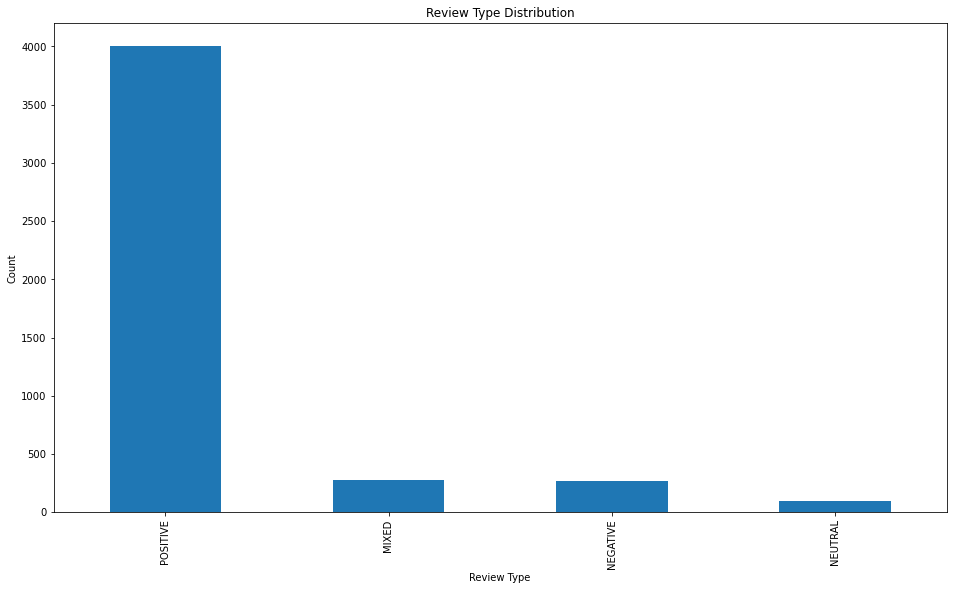

In [ ]:
review_type_count = df['REVIEW TYPE'].value_counts()

# plotting a bar chart to show types of reviews
fig, ax = plt.subplots(figsize=(16,9)) 
review_type_count.plot(kind='bar')
plt.title('Review Type Distribution')
plt.xlabel('Review Type')
plt.ylabel('Count')
plt.show()


On plotting the distribution of our target variable, we can see that the above bar-chart that the reviews are predominantly Positive. We only have few reviews that are mixed, negative and neutral indicating that our dataset is imbalanced.

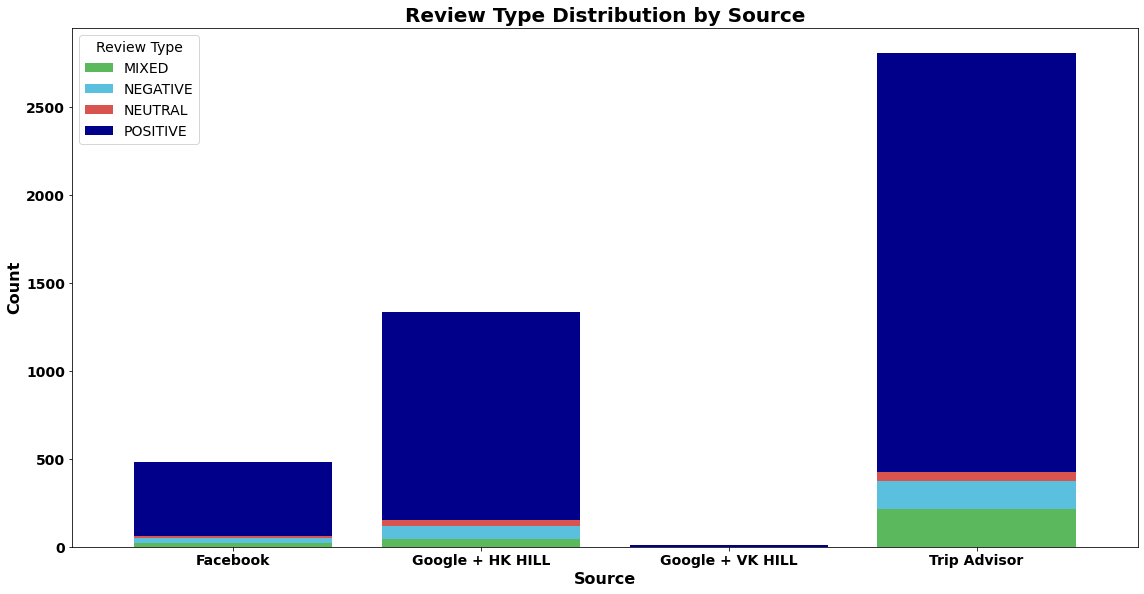

In [ ]:

grouped_data = EDA.groupby(['SOURCE', 'REVIEW TYPE']).size().reset_index(name='COUNT')

pivot_data = grouped_data.pivot(index='SOURCE', columns='REVIEW TYPE', values='COUNT')

fig, ax = plt.subplots(figsize=(16,9))  # set the size of the figure
pivot_data.plot(kind='bar', stacked=True, width=0.8, ax=ax, color=['#5cb85c', '#5bc0de', '#d9534f', '#00008B'])

plt.title('Review Type Distribution by Source', fontsize=20, fontweight='bold')
plt.xlabel('Source', fontsize=16, fontweight='bold')
plt.ylabel('Count', fontsize=16, fontweight='bold')

plt.xticks(rotation=0, fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')

plt.legend(title='Review Type', fontsize=14, title_fontsize=14)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)

# show the chart
plt.show()

Upon visualizing the distribution of reviews across different sources, we observed that Trip Advisor had the highest number of reviews, followed by Google+HK HILL and Facebook. On the other hand, Google+VK hill had the lowest number of reviews.

Regarding the sentiment analysis, we found that the majority of the reviews were classified as Positive, with Mixed reviews coming in second. In terms of negative reviews, we noticed that Google+HK Hill had the highest percentage of negative reviews among all the sources.

Overall, our dataset shows a clear variation in the number of reviews across different sources and the sentiment expressed in them, which highlights the importance of accounting for these factors in our analysis.

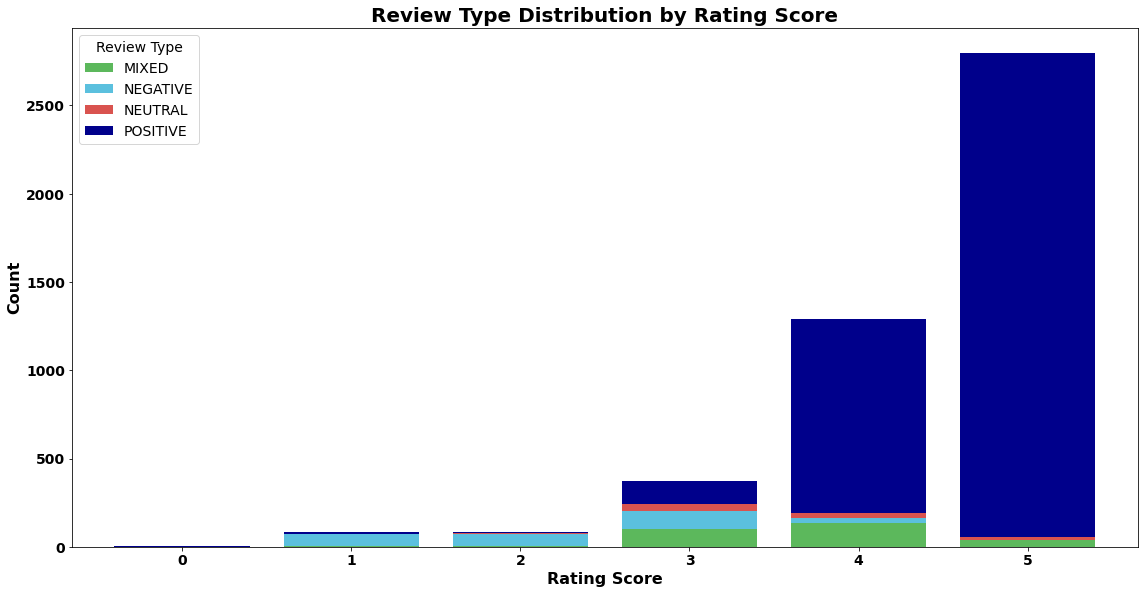

In [ ]:

grouped_data = EDA.groupby(['REVIEW RATING', 'REVIEW TYPE']).size().reset_index(name='COUNT')

pivot_data = grouped_data.pivot(index='REVIEW RATING', columns='REVIEW TYPE', values='COUNT')

fig, ax = plt.subplots(figsize=(16,9))  # set the size of the figure
pivot_data.plot(kind='bar', stacked=True, width=0.8, ax=ax, color=['#5cb85c', '#5bc0de', '#d9534f', '#00008B'])

plt.title('Review Type Distribution by Rating Score', fontsize=20, fontweight='bold')
plt.xlabel('Rating Score', fontsize=16, fontweight='bold')
plt.ylabel('Count', fontsize=16, fontweight='bold')

plt.xticks(rotation=0, fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')

plt.legend(title='Review Type', fontsize=14, title_fontsize=14)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)

# show the chart
plt.show()

Since the user's rating number is an integral part of their textual feedback, it is essential to explore the relationship between these two variables and the resulting sentiment of the review. Upon examining the visualization, it is apparent that a rating of 5 primarily indicates a positive review, with very few mixed or neutral reviews and practically no negative reviews. However, we found that a rating of 4 does not provide a clear indication of the review's sentiment, making it a less helpful feature in determining the overall sentiment of the review

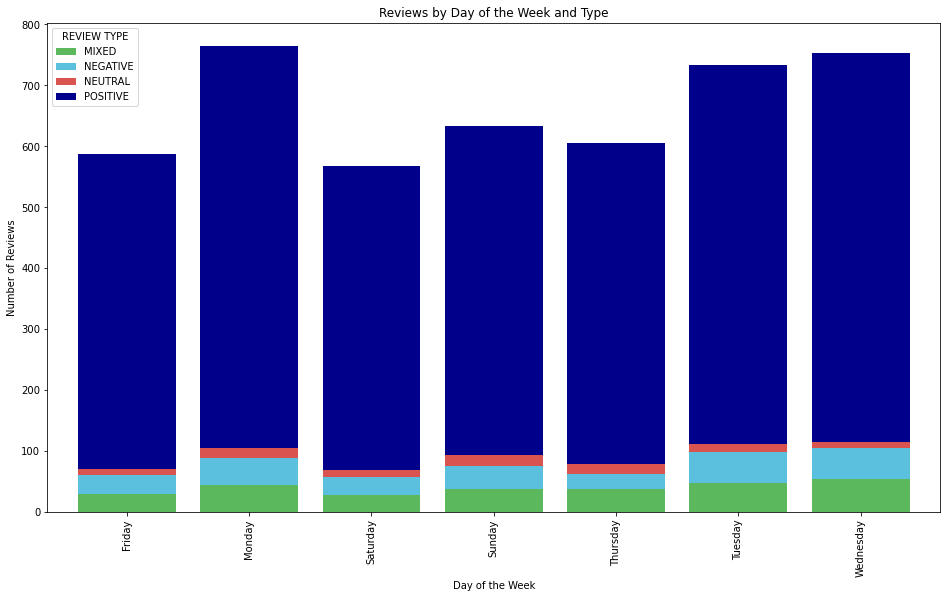

In [ ]:
# Convert the REVIEW DATE column to a datetime object
EDA['REVIEW DATE'] = pd.to_datetime(EDA['REVIEW DATE'])

# Add a new column with the day of the week
EDA['DAY OF WEEK'] = EDA['REVIEW DATE'].dt.day_name()

fig, ax = plt.subplots(figsize=(16,9))  # set the size of the figure

# Group the data by day of the week and review type
grouped_data = EDA.groupby(['DAY OF WEEK', 'REVIEW TYPE']).size().unstack()

# Create a stacked bar chart
ax = grouped_data.plot(kind='bar', stacked=True, width=0.8, ax=ax, color=['#5cb85c', '#5bc0de', '#d9534f', '#00008B'])

# Set the chart title and axis labels
ax.set_title('Reviews by Day of the Week and Type')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Number of Reviews')


# Display the chart
plt.show()

We further examined the target variable by visualizing it across different days of the week. We observed that Monday and Wednesday had the highest number of visitors, which is not surprising as these are culturally significant days in the Hindu culture.

Additionally, we found that Tuesday and Monday had the highest number of negative feedbacks compared to other days of the week. This finding highlights the importance of  considering the day of the week while analyzing customer feedback, as it could potentially impact the overall sentiment of the feedback received on a particular day.

## Feature extraction and selection for sentiment analysis

### TF-IDF scores

In [ ]:
q3 = pd.read_csv("PreProcessed_Data.csv")
q3['REVIEW']= q3['REVIEW'].replace(np.nan, '')
q3.head(10)

,REVIEW,REVIEW TYPE
0,commercial relatively new temple big hindu ver...,NEGATIVE
1,amazing temple bangalore friend enjoyed lot ic...,POSITIVE
2,well maintained temple otherworldly vibration ...,POSITIVE
3,temple icon temple good located west cord road...,POSITIVE
4,good place devotee believe ultimate god,POSITIVE
5,amazing come comfort god rejoice memory,POSITIVE
6,awesome,POSITIVE
7,visit icon spiritual person love icon great pl...,POSITIVE
8,fully commercialized place place good situated...,NEGATIVE
9,beaten path went sightseeing three people wide...,POSITIVE


In [ ]:
v = TfidfVectorizer()
sparse_matrix_tfidf = v.fit_transform(q3['REVIEW'])
pd.DataFrame(sparse_matrix_tfidf.toarray(), columns=v.get_feature_names_out())

,aa,aaaaaa,aae,aangekomen,aaradhya,ab,abandoned,abbreviation,abfertigung,abgeebn,...,youth,yr,yudhishtira,yum,zag,zig,zigzag,zijn,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
tfidf_weight = sum(sparse_matrix_tfidf).toarray()[0]

words_tfidf = pd.DataFrame(tfidf_weight, index=v.get_feature_names_out(), columns=['TF-IDF Weight'])
words_tfidf.sort_values(by='TF-IDF Weight',inplace=True,ascending=False)

In [ ]:
words_tfidf.head(50)

,TF-IDF Weight
temple,373.740329
place,330.582101
krishna,212.171827
visit,205.186382
nice,204.236264
good,202.720378
hare,185.298054
bangalore,151.050522
beautiful,142.291034
peaceful,122.049587


#### talk about the results of the TF-IDF top words (features)

### Chi-Square Test for Significance

In [ ]:
q3 = pd.read_csv("PreProcessed_Data.csv")
q3['REVIEW']= q3['REVIEW'].replace(np.nan, '')
q3.head(10)

,REVIEW,REVIEW TYPE
0,commercial relatively new temple big hindu ver...,NEGATIVE
1,amazing temple bangalore friend enjoyed lot ic...,POSITIVE
2,well maintained temple otherworldly vibration ...,POSITIVE
3,temple icon temple good located west cord road...,POSITIVE
4,good place devotee believe ultimate god,POSITIVE
5,amazing come comfort god rejoice memory,POSITIVE
6,awesome,POSITIVE
7,visit icon spiritual person love icon great pl...,POSITIVE
8,fully commercialized place place good situated...,NEGATIVE
9,beaten path went sightseeing three people wide...,POSITIVE


In [ ]:
word_vectorizer = CountVectorizer(ngram_range=(1,1), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(q3['REVIEW'])
X = np.where(sparse_matrix.toarray()>=1,1,0)
X_chs = pd.DataFrame(data = X ,columns=word_vectorizer.get_feature_names_out())
X_chs['FEEDBACK']=q3['REVIEW TYPE']
X_chs.sample(10)

,aa,aaaaaa,aae,aangekomen,aaradhya,ab,abandoned,abbreviation,abfertigung,abgeebn,...,yr,yudhishtira,yum,zag,zig,zigzag,zijn,zone,zoom,FEEDBACK
2416,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,POSITIVE
4217,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NEGATIVE
2247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NEGATIVE
1940,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,POSITIVE
4389,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,POSITIVE
3679,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NEGATIVE
4150,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,POSITIVE
4025,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,POSITIVE
3497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,POSITIVE
4517,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NEGATIVE


In [ ]:
y = X_chs['FEEDBACK']

ChiSqDF = pd.DataFrame()
ChiSqDF.index = X_chs.columns[:-1]

In [ ]:
for word in ChiSqDF.index:
  crosstab, test_results, expected = rp.crosstab(X_chs[word].astype(object), 
                                               y,
                                               test= "chi-square",
                                               expected_freqs= True)
  
  #print(word, test_results['results'][0] ,test_results['results'][1])
  
  ChiSqDF.at[word,'Chi-Sq'] = test_results['results'][0]
  ChiSqDF.at[word,'P-Value'] = test_results['results'][1]

In [ ]:
ChiSqDF.sort_values(by='Chi-Sq', ascending=False, inplace=True)

In [ ]:
ChiSqDF.head(50)

,Chi-Sq,P-Value
commercial,539.4918,0.0
commercialized,459.3846,0.0
like,259.8057,0.0
money,257.4570,0.0
business,253.4720,0.0
selling,222.8172,0.0
shopping,194.8167,0.0
mall,193.7779,0.0
thing,159.7377,0.0
sell,147.9434,0.0


In [ ]:
ChiSqDF[(ChiSqDF['P-Value'] < 0.05)].value_counts().sort_index()

Chi-Sq    P-Value
7.8783    0.0486     5
7.8985    0.0482     1
7.9102    0.0479     1
7.9501    0.0471     1
8.0053    0.0459     1
                    ..
253.4720  0.0000     1
257.4570  0.0000     1
259.8057  0.0000     1
459.3846  0.0000     1
539.4918  0.0000     1
Length: 551, dtype: int64

#### Explain how we used Chi-Square results for feature selection. 

## Sentiment Analysis Prediction using Naive Bayes Classifier

#### Using the TF-IDF values of individual words, we can train a Bayes Classifier to predict the sentiment of a review.

In [ ]:
q4 = q3.copy()

#### From the Chi-Square tests, we found out that for 551 words, their presence has significant relationship (95% confidence interval) with the type of sentiment.
We can use all of these words or select a subset that are the most significant words (large Chi-Square statistic). 

In [ ]:
# Initialize classifier model
mnb = MultinomialNB()

# Use the 275 most singificant ones from the 551 words
feature_words = ChiSqDF.sort_values(by='Chi-Sq', ascending=False).head(275).index

# Make dataframe from TFIDF array with word label to select 
temp = pd.DataFrame(sparse_matrix_tfidf.toarray(), columns=v.get_feature_names_out())

# Input features
X = temp.loc[:, feature_words]
# Target
y = q4['REVIEW TYPE']
  
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)  
bayes = mnb.fit(X_train, y_train)
y_pred = bayes.predict(X_test)
y_pred

array(['POSITIVE', 'POSITIVE', 'POSITIVE', ..., 'POSITIVE', 'POSITIVE',
       'POSITIVE'], dtype='<U8')

In [ ]:
# Visualize confusion matrix
conf_mat_df = confusion_matrix(y_test,  y_pred)

ConfusionMatrixDisplay(confusion_matrix=conf_mat_df,
                               display_labels=mnb.classes_).plot()

plt.figure(figsize=(9,5))

print(classification_report(y_test, y_pred))

#### The test performance is not satisfactory. We can see that the classifer simply predicts that all reviews are positive. This is because the dataset is highly imbalanced (86% positive and 14% negative/mixed/neutral), so the classifier can simply achieve low classification error by predicting everything as the most common class.

## Sampling Techniques

#### Sampling strategies can help address class imbalance.
- Under sampling: this approach allows us to use real samples, but at the cost of disregarding extra samples in the more frequent classes. In addition, the samples disregarded are the ones that are "far" from other classes, which may lead to worse training performance.
- Over sampling using SMOTE: augments sample size by generating synthetic data. We utilize all the samples we have, but there is no gurantee that the synthetic data can represent real samples.

#### Undersamping using NearMiss

In [ ]:
undersample = NearMiss(version=1, n_neighbors=3)
X_undersample, y_undersample = undersample.fit_resample(X_train, y_train)

In [ ]:
np.unique(y_undersample, return_counts=True)

(array(['MIXED', 'NEGATIVE', 'NEUTRAL', 'POSITIVE'], dtype=object),
 array([70, 70, 70, 70]))

In [ ]:
bayes = mnb.fit(X_undersample, y_undersample)
y_pred_underSample = bayes.predict(X_test)

              precision    recall  f1-score   support

       MIXED       0.05      0.41      0.09        74
    NEGATIVE       0.22      0.51      0.31        69
     NEUTRAL       0.03      0.55      0.05        22
    POSITIVE       0.50      0.00      0.00       996

    accuracy                           0.07      1161
   macro avg       0.20      0.36      0.11      1161
weighted avg       0.45      0.07      0.03      1161



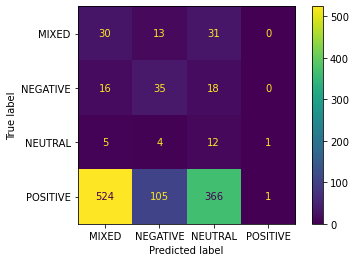

<Figure size 648x360 with 0 Axes>

In [ ]:
conf_mat_US_df = confusion_matrix(y_test,  y_pred_underSample)

ConfusionMatrixDisplay(confusion_matrix=conf_mat_US_df,
                               display_labels=mnb.classes_).plot()

plt.figure(figsize=(9,5))

print(classification_report(y_test, y_pred_underSample))

#### Undersampling improved the test performance of the classifier in predicting the minority classes, but the prediction of positive class degraded significantly! Therefore, the overall performance is not satisfactory.

#### Oversampling using SMOTE algorithm

In [ ]:
oversample = SMOTE( random_state=7, k_neighbors=3)
X_oversampled, y_oversampled = oversample.fit_resample(X_train,y_train)
X_oversampled.shape

(12024, 275)

In [ ]:
bayes = mnb.fit(X_oversampled, y_oversampled)
y_pred_overSample = bayes.predict(X_test)

              precision    recall  f1-score   support

       MIXED       0.11      0.51      0.18        74
    NEGATIVE       0.29      0.58      0.39        69
     NEUTRAL       0.12      0.41      0.19        22
    POSITIVE       0.97      0.58      0.73       996

    accuracy                           0.57      1161
   macro avg       0.37      0.52      0.37      1161
weighted avg       0.86      0.57      0.66      1161



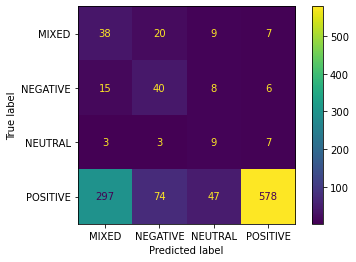

<Figure size 648x360 with 0 Axes>

In [ ]:
conf_mat_OS_df = confusion_matrix(y_test,  y_pred_overSample)

ConfusionMatrixDisplay(confusion_matrix=conf_mat_OS_df,
                               display_labels=mnb.classes_).plot()

plt.figure(figsize=(9,5))

print(classification_report(y_test, y_pred_overSample))

#### The model test performance is much better when oversampling was used. The performance on predicting positive class is similar to a naive classification, and the prediction on minority classes improved. Therefore, oversample approach is preferred for our task.

## Sentiment Analysis Prediction using Lexicon-based approach

In [ ]:
#Create a dataframe that contains all the words present in the reviews
AFINN_DF = pd.DataFrame()
AFINN_DF['WORD'] = words_tfidf.index
Neutral_words = []

#Calcualte the Afinn score for each word
for word in AFINN_DF['WORD']:
    afinn_score = Afinn().score(word)
    AFINN_DF.at[word, 'AFINN SCORE'] = afinn_score
    
    #Create a seperate list of neutral (Afinn score = 0) words      
    if afinn_score==0:
        Neutral_words.append(word)

    #print(word, ': ', Afinn().score(word))

In [ ]:
AFINN_DF['AFINN SCORE'].value_counts().sort_index()

-4.0       1
-3.0      47
-2.0     185
-1.0      98
 0.0    5723
 1.0     118
 2.0     249
 3.0      92
 4.0      17
 5.0       3
Name: AFINN SCORE, dtype: int64

We see that a majority of the words in the reviews are neutral words with no emotions. Since we plan on calculating the average Afinn score for each review, neutral words must be removed since they bias the average Afinn score towards 0.

In [ ]:
# Number of Neutral words, i.e. AFINN=0
len(Neutral_words)

5723

In [ ]:
q6 = q3.copy()
q6.head(10)

,REVIEW,REVIEW TYPE
0,commercial relatively new temple big hindu ver...,NEGATIVE
1,amazing temple bangalore friend enjoyed lot ic...,POSITIVE
2,well maintained temple otherworldly vibration ...,POSITIVE
3,temple icon temple good located west cord road...,POSITIVE
4,good place devotee believe ultimate god,POSITIVE
5,amazing come comfort god rejoice memory,POSITIVE
6,awesome,POSITIVE
7,visit icon spiritual person love icon great pl...,POSITIVE
8,fully commercialized place place good situated...,NEGATIVE
9,beaten path went sightseeing three people wide...,POSITIVE


In [ ]:
for index,row in q6.iterrows():
  # Tokenize
  q6.at[index, 'REVIEW'] = word_tokenize(row['REVIEW'])

  # Remove Neutral Words
  q6.at[index, 'REVIEW'] = [word for word in row['REVIEW'] if word not in Neutral_words]

  # Convert the tokenized words into a string
  q6.at[index, 'REVIEW'] = ' '.join(word for word in row['REVIEW'])
 
q6.head(10)

,REVIEW,REVIEW TYPE
0,big accept polite destroy leave worst quality ...,NEGATIVE
1,amazing friend enjoyed,POSITIVE
2,excellent free accessible,POSITIVE
3,good god good please,POSITIVE
4,good god,POSITIVE
5,amazing comfort god rejoice,POSITIVE
6,awesome,POSITIVE
7,love great wonderful,POSITIVE
8,good,NEGATIVE
9,beaten yes friendly severe,POSITIVE


#### We now calculate the total and average Afinn scores of each review, based on the non-neutral words in the review

In [ ]:
for index, row in q6.iterrows():
  
  q6.at[index, 'SUM AFINN SCORE'] = Afinn().score(row['REVIEW'])

  q6.at[index, 'AVG AFINN SCORE'] = q6.at[index, 'SUM AFINN SCORE']/ len(word_tokenize(row['REVIEW']))
  
  # Predict Sentiment based on Total AFINN Score
  if q6.at[index, 'SUM AFINN SCORE'] > 0:
    q6.at[index, 'AFINN SENTIMENT'] = "POSITIVE"

  elif q6.at[index, 'SUM AFINN SCORE'] < 0:
    q6.at[index, 'AFINN SENTIMENT'] = "NEGATIVE"
    
  else:
    q6.at[index, 'AFINN SENTIMENT'] = "MIXED"

  # Predict Sentiment based on Average AFINN Score
  if q6.at[index, 'AVG AFINN SCORE'] > 2:
    q6.at[index, 'AVG AFINN SENTIMENT'] = "POSITIVE"

  elif q6.at[index, 'AVG AFINN SCORE'] < 2:
    q6.at[index, 'AVG AFINN SENTIMENT'] = "NEGATIVE"
    
  else:
    q6.at[index, 'AVG AFINN SENTIMENT'] = "MIXED"

/var/folders/9n/4cg381ms2tsbl0w_zn8rkvcc0000gn/T/ipykernel_59561/3815375741.py:5: RuntimeWarning: invalid value encountered in double_scalars
  q6.at[index, 'AVG AFINN SCORE'] = q6.at[index, 'SUM AFINN SCORE']/ len(word_tokenize(row['REVIEW']))


In [ ]:
q6.describe()

,SUM AFINN SCORE,AVG AFINN SCORE
count,4641.000000,4348.000000
mean,7.264814,2.131625
std,5.985607,0.918681
min,-8.000000,-3.000000
25%,3.000000,1.666667
50%,6.000000,2.250000
75%,10.000000,2.800000
max,85.000000,5.000000


#### SUM AFINN SCORE DISTRIBUTION

<AxesSubplot:xlabel='REVIEW TYPE', ylabel='SUM AFINN SCORE'>

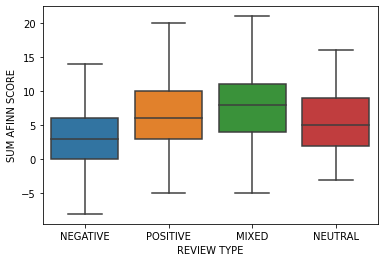

In [ ]:
sns.boxplot(data=q6, x="REVIEW TYPE", y="SUM AFINN SCORE", showfliers=False)

This plot compares the distribution of the sum of Afinn scores for each review type. We notice that there is an overlap in the distribution of the overall Afinn score of negative and positive reviews. One possible explanation for this could be the Afinn score of a review getting impacted by the length of the review (a long review with slightly positive words could possibly have the same total Afinn score, as that of a shorter review with highly positive words).

#### AVERAGE AFINN SCORE DISTRIBUTION

<AxesSubplot:xlabel='REVIEW TYPE', ylabel='AVG AFINN SCORE'>

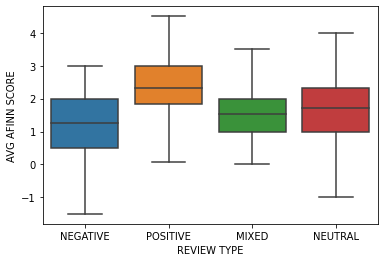

In [ ]:
sns.boxplot(data=q6, x="REVIEW TYPE", y="AVG AFINN SCORE", showfliers=False)

A similar plot is made for the Average Afinn score for each kind of review. We see that 75% of the negative reviews have an average Afinn score below 2, whereas 75% of the positive reviews have an average Afinn score of above 2. In this case, the overlap between the distributions for negative and positive reviews is smaller, since the average Afinn score is less likely to be impacted by the review length. The median of average Afinn scores of mixed and neutral is similar, as expected. Based on this, we can possibly mark reviews with average Afinn scores above 2 as positive, and those with average score below 2 as negative.

#### CLASSIFICATION MATRIX OF ACTUAL VS PREDICTED SENTIMENT BASED ON THE TOTAL AFINN

              precision    recall  f1-score   support

       MIXED       0.04      0.05      0.05       277
    NEGATIVE       0.37      0.11      0.17       270
     NEUTRAL       0.00      0.00      0.00        92
    POSITIVE       0.87      0.92      0.89      4002

    accuracy                           0.80      4641
   macro avg       0.32      0.27      0.28      4641
weighted avg       0.78      0.80      0.78      4641



/Users/pavanaj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pavanaj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pavanaj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


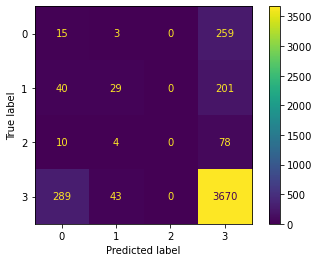

<Figure size 648x360 with 0 Axes>

In [ ]:
conf_mat_AFINN = confusion_matrix(q6["REVIEW TYPE"],  q6["AFINN SENTIMENT"])

ConfusionMatrixDisplay(confusion_matrix=conf_mat_AFINN).plot()
                               
plt.figure(figsize=(9,5))

print(classification_report(q6["REVIEW TYPE"],  q6["AFINN SENTIMENT"]))

For the sum, reviews with total Afinn score above 0 were marked as positive and total score below 0 were marked as negative reviews. These predictions were then compared against the actual sentiment labelled in the dataset. We see that this method classifies the reivews better than the Naive Bayes classifier from previous question. It is particularly good at identifying the positive class, with precision = 0.87 and accuracy = 0.92

#### CLASSIFICATION MATRIX OF ACTUAL VS PREDICTED SENTIMENT BASED ON THE AVERAGE AFINN

              precision    recall  f1-score   support

       MIXED       0.02      0.02      0.02       277
    NEGATIVE       0.10      0.76      0.18       270
     NEUTRAL       0.00      0.00      0.00        92
    POSITIVE       0.94      0.55      0.70      4002

    accuracy                           0.52      4641
   macro avg       0.27      0.33      0.22      4641
weighted avg       0.82      0.52      0.61      4641



/Users/pavanaj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pavanaj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pavanaj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


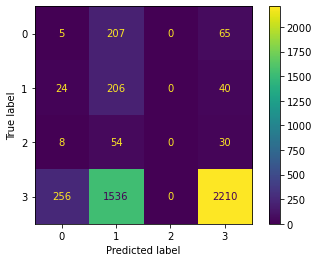

<Figure size 648x360 with 0 Axes>

In [ ]:
conf_mat_AFINN = confusion_matrix(q6["REVIEW TYPE"],  q6["AVG AFINN SENTIMENT"])

ConfusionMatrixDisplay(confusion_matrix=conf_mat_AFINN).plot()
                               
plt.figure(figsize=(9,5))

print(classification_report(q6["REVIEW TYPE"],  q6["AVG AFINN SENTIMENT"]))

For the average, reviews with average Afinn score above 2 were predicted as positive and average score below 2 were predicted as negative reviews. The value of 2 was picked based on the distribution of the average afinn scores for each type of review. This approach, outperforms both - the Naive Bayes and the Afinn model which uses the sum of Afinn scores. This is expected because we see a much more significant difference in the distribution of the scores for positive and negative reviews (less overlap) for the average scores, as compared to the sum.

## Emotion Analysis

In [ ]:
q7=q3.copy()

In [ ]:
final_list=[]

In [ ]:
for index,row in q7.iterrows():
  temp=[]
  for word in word_tokenize(str(row['REVIEW'])):
    temp.append(dict(NRCLex(word).top_emotions))
  counter = collections.Counter()
  for d in temp: 
    counter.update(d)
  temp_dict=dict(counter)
  temp_dict['REVIEW']=row['REVIEW']
  temp_dict['REVIEW TYPE']=row['REVIEW TYPE']
  final_list.append(temp_dict)
  print(temp_dict)

{'fear': 0.8666666666666667, 'anger': 0.3666666666666667, 'anticip': 0.0, 'trust': 0.8333333333333333, 'surprise': 0.5, 'positive': 8.333333333333332, 'negative': 0.5333333333333333, 'sadness': 0.5333333333333333, 'disgust': 0.2, 'joy': 0.6666666666666666, 'anticipation': 1.1666666666666667, 'REVIEW': 'commercial relatively new temple big hindu version disney land quite expensive entrance temple accept religious dress code allowed enter short rent indian lung male long dress guard polite almost unfriendly one lady guard destroy expensive camera leave outside inside temple follow marked way somewhere blessed holy man everywhere stand different thing sale worst way enormous market holy souvenir different quality kit plastic thing made china holy experience looked forward disappeared commercial thing wanted money', 'REVIEW TYPE': 'NEGATIVE'}
{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 'trust': 0.3333333333333333, 'surprise': 0.0, 'positive': 1.3333333333333333, 'negative': 0.0, 'sadness':

In [ ]:
final_q7=pd.DataFrame.from_dict(final_list, orient='columns')
final_q7=final_q7.iloc[:, [11, 12, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]

In [ ]:
final_q7.drop(['anticip'], axis=1, inplace=True)

In [ ]:
final_q7.head(10)

,REVIEW,REVIEW TYPE,fear,anger,trust,surprise,positive,negative,sadness,disgust,joy,anticipation
0,commercial relatively new temple big hindu ver...,NEGATIVE,0.866667,0.366667,0.833333,0.500000,8.333333,0.533333,0.533333,0.2,0.666667,1.166667
1,amazing temple bangalore friend enjoyed lot ic...,POSITIVE,0.000000,0.000000,0.333333,0.000000,1.333333,0.000000,0.000000,0.0,0.333333,NaN
2,well maintained temple otherworldly vibration ...,POSITIVE,0.000000,0.000000,1.583333,0.000000,3.583333,0.000000,0.000000,0.0,0.583333,0.250000
3,temple icon temple good located west cord road...,POSITIVE,0.200000,0.000000,0.600000,0.400000,1.600000,0.000000,0.000000,0.0,0.600000,0.600000
4,good place devotee believe ultimate god,POSITIVE,0.200000,0.000000,0.400000,0.200000,0.400000,0.000000,0.500000,0.0,0.400000,0.900000
5,amazing come comfort god rejoice memory,POSITIVE,0.200000,0.000000,0.650000,0.200000,0.650000,0.000000,0.000000,0.0,0.650000,0.650000
6,awesome,POSITIVE,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN
7,visit icon spiritual person love icon great pl...,POSITIVE,0.000000,0.000000,0.250000,0.250000,1.750000,0.000000,0.000000,0.0,0.750000,NaN
8,fully commercialized place place good situated...,NEGATIVE,0.000000,0.166667,1.366667,0.366667,1.366667,0.000000,0.000000,0.0,0.366667,0.366667
9,beaten path went sightseeing three people wide...,POSITIVE,0.400000,0.500000,0.650000,1.000000,1.650000,0.500000,0.000000,0.0,0.650000,1.650000


In [ ]:
final_q7.iloc[:,2:11].sum(axis=0).sort_values(ascending=False)

positive    10658.882143
trust        4078.865476
joy          2974.265476
negative     1514.698810
surprise     1043.786905
fear          545.610714
disgust       463.894048
sadness       355.140476
anger         352.610714
dtype: float64

#### Histogram showing the distribution of Emotions

In [ ]:
plot_q7=pd.DataFrame(final_q7.iloc[:,2:11].sum(axis=0).sort_values(ascending=False)).reset_index()
plot_q7.columns=['Emotion', 'NRC Score']

<Axes: xlabel='Emotion', ylabel='NRC Score'>

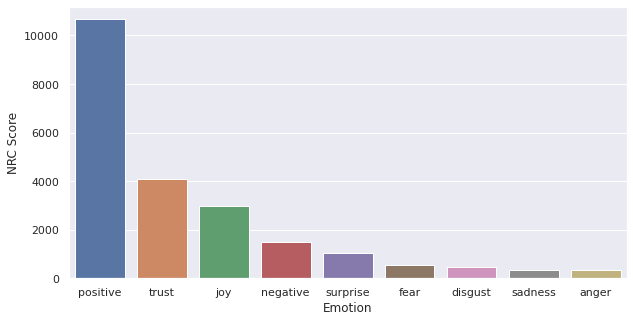

In [ ]:
sns.set(rc={"figure.figsize":(10, 5)}) 
sns.barplot(data=plot_q7, x='Emotion', y='NRC Score')

### The above output summarizes the emotions conveyed across all reviews:
- Positivity and Trust seem to stand out the most, followed by Joy
- Some Negative emotions are conveyed through reviews, as well as Surprise 
- Anger and Sadness were the least common emotions overall

## Insights from Analysis

In [ ]:
# !pip install wordcloud
from wordcloud import WordCloud

In [ ]:
q8=pd.read_csv('PreProcessed_Data.csv')
q8.head(2)

,REVIEW,REVIEW TYPE
0,commercial relatively new temple big hindu ver...,NEGATIVE
1,amazing temple bangalore friend enjoyed lot ic...,POSITIVE


In [ ]:
negative_text=q8[q8['REVIEW TYPE']=='NEGATIVE']['REVIEW']
positive_text=q8[q8['REVIEW TYPE']=='POSITIVE']['REVIEW']

###Wordcloud for negative reviews:

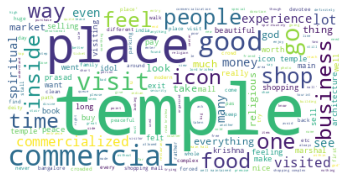

In [ ]:
wordcloud = WordCloud(background_color="white").generate(str(negative_text.values))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

###Wordcloud for positive reviews:

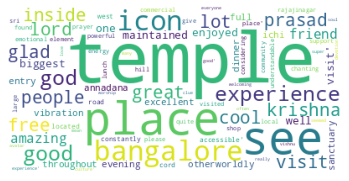

In [ ]:
wordcloud = WordCloud(background_color="white").generate(str(positive_text.values))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### Both negative and positive reviews have words that relate to the context of the case, i.e. reviews whether positive or negative use words to describe the context that don't necessarily convey a sentiment. For example - words like temple, place, Iskcon etc.
### Filtering these out creating another word cloud.

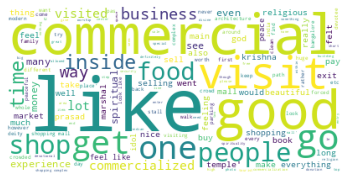

In [ ]:
wordcloud = WordCloud(background_color="white", stopwords=['temple', 'place', 'icon']).generate(str(negative_text.values))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### From the word cloud based on negative reviews, the common theme is the commercial/business aspect of the temple. The negative reviews generally describe the abundance of shops as well as people at the temple. The commercialization of a religious landmark may be be disliked by a certain group of visitors causing them to leave negative reviews.

Examples of such reviews include:
* "Beautiful modern temple but highly commercialized"
* "This place was so much commercial almost everything is sold here"
* "One who do not wants to go to shops has to because no other way to direct exit"

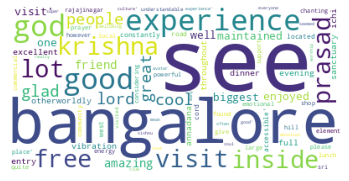

In [ ]:
wordcloud = WordCloud(background_color="white", stopwords=['temple', 'place', 'icon']).generate(str(positive_text.values))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### The wordcloud of positive reviews, indicates that people loved the overall experience, especially the city of Bangalore itself. The free entry and prasad (religious food offering) seem to also be associated with positive experiences/reviews. Lastly, words like God, Krishna, or Lord indicate that people who are religious, or those who tend to refer to deities tend to have positive experiences as well.

Examples of such reviews include:
* "There is a free normal darshan and paid special darshan"
* "There is free Prasad at the exit"
* "Because the free prasadam, which is the most tastiest is served hot only at the end of the temple"